In [612]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

print("Imported all the libraries to be used")

Imported all the libraries to be used


In [613]:
df= pd.read_csv('coronavirus.csv')
df.head()

,date,province,country,lat,long,type,cases
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,confirmed,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,confirmed,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,confirmed,0


# Preprocessing the data

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147580 entries, 0 to 147579
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      147580 non-null  object 
 1   province  43052 non-null   object 
 2   country   147580 non-null  object 
 3   lat       147580 non-null  float64
 4   long      147580 non-null  float64
 5   type      147580 non-null  object 
 6   cases     147580 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 7.9+ MB


In [615]:
df.isna().sum() #to see the number of fields with na

date             0
province    104528
country          0
lat              0
long             0
type             0
cases            0
dtype: int64

In [616]:
df.fillna(value="Not applicable", inplace=True) 
df.isna().sum()

date        0
province    0
country     0
lat         0
long        0
type        0
cases       0
dtype: int64

In [617]:
df['type'].value_counts() 

death        50008
confirmed    50008
recovered    47564
Name: type, dtype: int64

*The recovered data for (50008-47564) days is missing, therefore we will consider the number of recoveries for those days=0*

In [618]:
import warnings
warnings.filterwarnings('ignore')
df['confirmed']=df.cases
df['death']=df.cases
df['recovered']=df.cases
#df.confirmed[20000]=5
#print(df.cases[20000],df.confirmed[20000],df.death[20000],df.recovered[20000])
for i in range(0, len(df)):
    if (df.type[i]=='confirmed'):
        df.confirmed[i]=df.cases[i]
        df.death[i]=0
        df.recovered[i]=0
    if (df.type[i]=='recovered'):
        df.recovered[i]=df.cases[i]
        df.confirmed[i]=0
        df.death[i]=0
    if (df.type[i]=='death'):
        df.death[i]=df.cases[i]
        df.confirmed[i]=0
        df.recovered[i]=0
 
#cols = ['type','cases']
#df=df.drop(cols, axis=1)

df.head()

,date,province,country,lat,long,type,cases,confirmed,death,recovered
0,2020-01-22,Not applicable,Afghanistan,33.93911,67.709953,confirmed,0,0,0,0
1,2020-01-23,Not applicable,Afghanistan,33.93911,67.709953,confirmed,0,0,0,0
2,2020-01-24,Not applicable,Afghanistan,33.93911,67.709953,confirmed,0,0,0,0
3,2020-01-25,Not applicable,Afghanistan,33.93911,67.709953,confirmed,0,0,0,0
4,2020-01-26,Not applicable,Afghanistan,33.93911,67.709953,confirmed,0,0,0,0


# Plot 1

In [619]:
col=['lat','long','country','province','type','cases']
dftrend=df.drop(col, axis=1)
dftrend = dftrend.groupby('date', axis=0).sum()
dftrend.head(188)

,confirmed,death,recovered
date,,,
2020-01-22,555,17,28
2020-01-23,99,1,2
2020-01-24,287,8,6
2020-01-25,493,16,3
2020-01-26,684,14,13
...,...,...,...
2020-07-23,282756,9966,170164
2020-07-24,281165,6144,229317
2020-07-25,255545,4867,219317


In [620]:
dfencountered=dftrend
dfencountered['Active Cases'] = dfencountered.confirmed-(dfencountered.death+dfencountered.recovered)
c=['confirmed']
dfencountered=dfencountered.drop(c, axis=1).transpose()
dfencountered['Total'] = dfencountered.sum(axis=1)
dfencountered.head(189)

date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,Total
death,17,1,8,16,14,26,49,2,38,42,...,4029,4160,6238,6983,9966,6144,4867,4104,5415,654052
recovered,28,2,6,3,13,9,46,19,17,79,...,87877,158996,174490,176544,170164,229317,219317,134985,175114,9572619
Active Cases,510,96,273,474,657,774,2556,567,2013,1572,...,122741,43622,52727,97120,102626,45704,31361,65517,48160,6254559


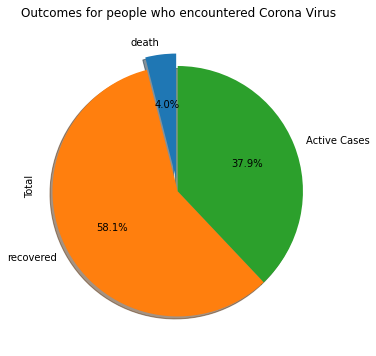

In [621]:
dfencountered['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,        # add shadow   
                            explode = (0.1,0, 0) # explode 1st (percent of patients who died)
                            )
plt.title('Outcomes for people who encountered Corona Virus')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

**Analysis:**
From all the people who got infected by Corona virus, more than half of the people(58.1%) got recovered and only 4% of the people died in the world. Thus, the fatality rate for COVID is very less.


# Plot 2

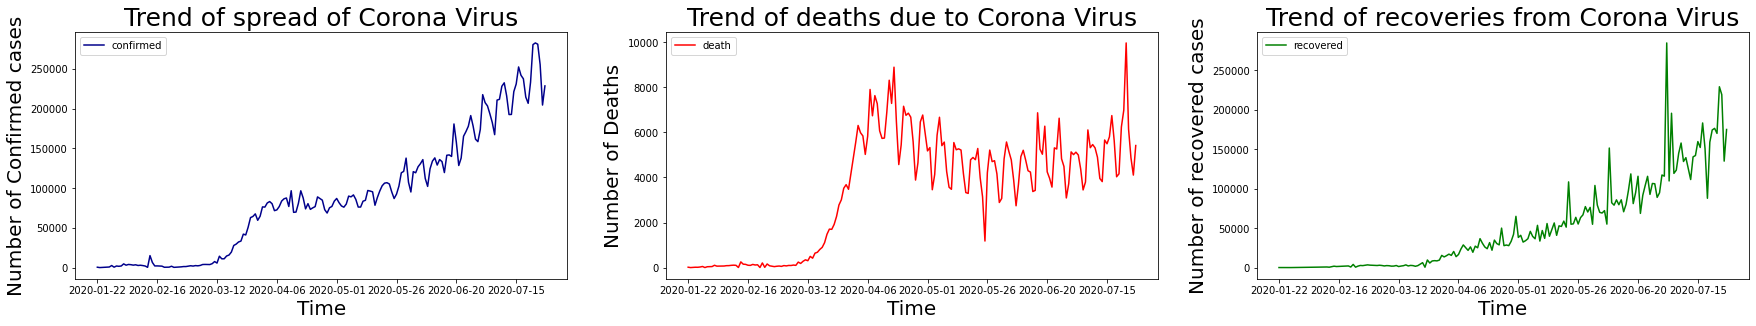

In [622]:
# reset index to bring the dates in as a column
dftrend.reset_index(inplace=True)


fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
dftrend.plot(kind='line', x='date', y='confirmed', figsize=(30,10), color='darkblue', ax=ax0)
ax0.set_title('Trend of spread of Corona Virus',fontsize=25)
ax0.set_xlabel('Time',fontsize=20)
ax0.set_ylabel('Number of Confirmed cases',fontsize=20)

# Subplot 2: Line plot
dftrend.plot(kind='line', x='date', y='death', figsize=(30,10), color='red',ax=ax1)
ax1.set_title('Trend of deaths due to Corona Virus',fontsize=25)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Number of Deaths',fontsize=20)

# Subplot 3: Line plot
dftrend.plot(kind='line', x='date', y='recovered', figsize=(30,10), color='green',ax=ax2)
ax2.set_title('Trend of recoveries from Corona Virus',fontsize=25)
ax2.set_xlabel('Time',fontsize=20)
ax2.set_ylabel('Number of recovered cases',fontsize=20)
plt.show()


**Analysis:**
The rate of increase of spread of virus increased rapidly in the beginning. The curve flattened in the medieval time but then the spread again increased in the month of May. The deaths in the initial period were more since the cure was not known but the death curve has flattened now. The recovery rate has been consistently increasing from March onwards.

# Plot 3

In [623]:
lon=['long','country','province','date','cases','type']
df_lat=df.drop(lon, axis=1)
df_lat=df_lat.groupby('lat').sum()
df_lat.reset_index(inplace=True)
df_lat['Recovery rate']= (df_lat.recovered)/(df_lat.confirmed)*100
df_lat['zone']=df_lat.lat
for i in range(0, len(df_lat)):
    if (df_lat.lat[i]>=-23.5 and df_lat.lat[i]<=23.5):
        df_lat.zone[i]="Torrid"
    if ((df_lat.lat[i]>=-66.5 and df_lat.lat[i]<-23.5) or (df_lat.lat[i]>23.5 and df_lat.lat[i]<=66.5)):
        df_lat.zone[i]="Temperate"
    if (df_lat.lat[i]>66.5 or df_lat.lat[i]<-66.5):
        df_lat.zone[i]="Frigid"
df_lat.head(100)

,lat,confirmed,death,recovered,Recovery rate,zone
0,-51.796300,13,0,13,100.000000,Temperate
1,-42.882100,229,13,215,93.886463,Temperate
2,-40.900600,1557,22,1514,97.238279,Temperate
3,-38.416100,167416,3059,72575,43.350098,Temperate
4,-37.813600,9049,83,3817,42.181457,Temperate
...,...,...,...,...,...,...
95,14.058324,431,0,365,84.686775,Torrid
96,14.497400,9764,194,6477,66.335518,Torrid
97,14.641500,269,15,98,36.431227,Torrid
98,15.179400,265,0,191,72.075472,Torrid


Text(0, 0.5, 'Recovery Rate')

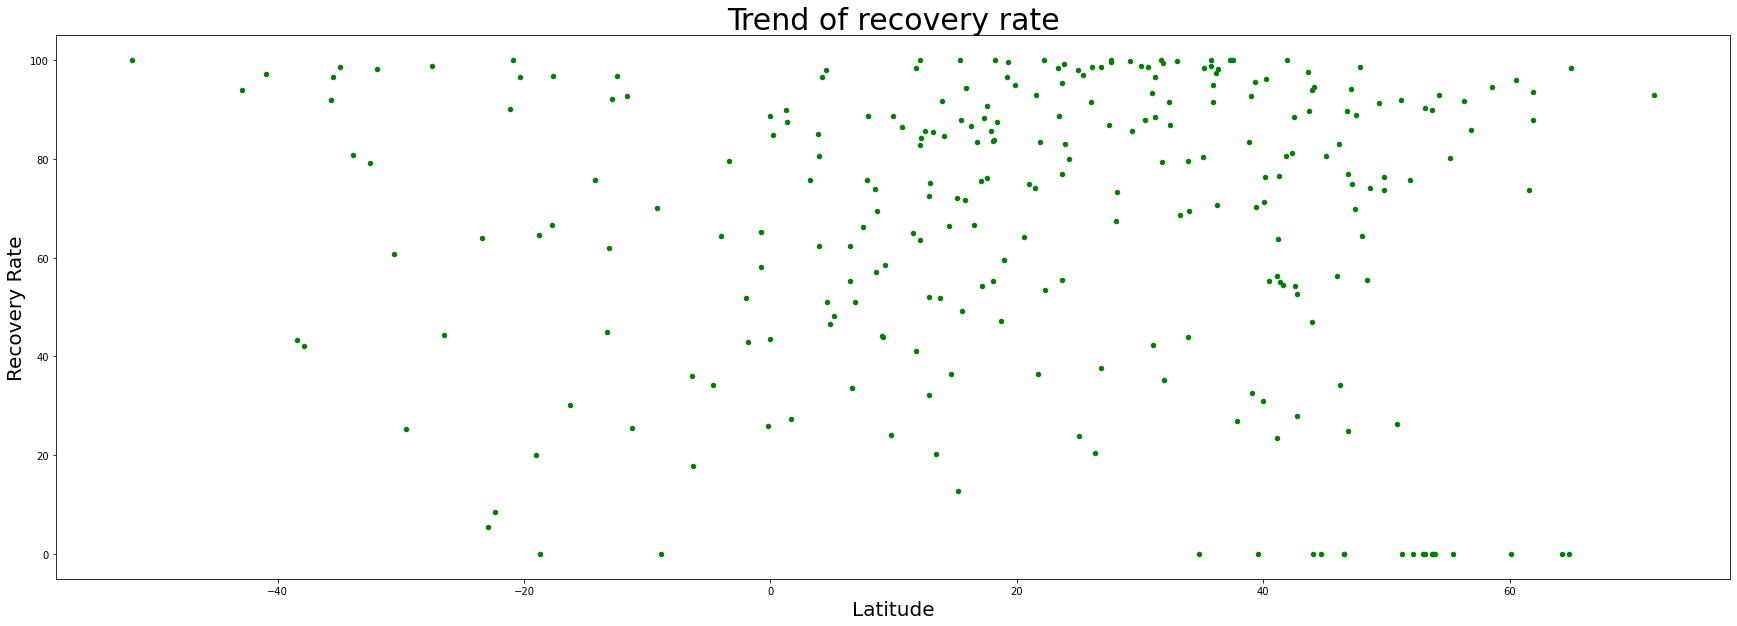

In [624]:
df_lat.plot(kind='scatter', x='lat', y='Recovery rate', figsize=(30,10), color='green')
plt.title('Trend of recovery rate',fontsize=30)
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Recovery Rate',fontsize=20)

**Analysis:**
No specific trends can be observed in the spread of virus based on the latitudes. Therefore, the latitudes don't play a significant role in the spread of virus. 

# Plot 4

In [625]:
drop=['lat','death','recovered','Recovery rate']
df_zone=df_lat.drop(drop,axis=1)
df_zone=df_zone.groupby('zone').sum()
df_zone.head()

,confirmed
zone,
Frigid,14
Temperate,10812957
Torrid,5668259


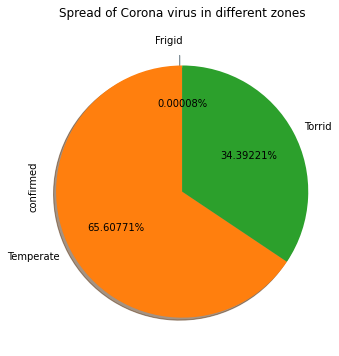

In [626]:
df_zone['confirmed'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.5f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,        # add shadow   
                            explode = (0.1,0, 0) # explode 1st (percent of patients who died)
                            )
plt.title('Spread of Corona virus in different zones')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

**Analysis:**
Torrid zone being the hottest zone has lesser number of confirmed cases in comparison to the temperate zone since the moderate climate of the temperate zone facililates the growth of the virus. The frigid zone has negligible number of cases due to less human habitation.

# Plot 5

In [627]:
con= ['province', 'death','recovered', 'lat', 'long','cases']
df_USI = df.drop(con,axis=1)
df_USI = df_USI[df_USI.type == 'confirmed']

df_US=df_USI
df_US = df_US[df_US.country == 'US']
df_US.set_index('date',inplace=True)

df_IN=df_USI
df_IN = df_IN[df_IN.country == 'India']
df_IN['dates']=df_IN.date
df_IN.set_index('date',inplace=True)

details = { 
    'US' : df_US.confirmed, 
    'India' : df_IN.confirmed, 
} 
  
dfUSI = pd.DataFrame(details, columns = ['US', 
                                      'India'], 
                    index = df_IN.dates) 
  

dfUSI.reset_index(inplace=True)
#print(dfUSI.shape, df_US.shape)
dfUSI.head(188)

,dates,US,India
0,2020-01-22,1,0
1,2020-01-23,0,0
2,2020-01-24,1,0
3,2020-01-25,0,0
4,2020-01-26,3,0
...,...,...,...
183,2020-07-23,68695,49310
184,2020-07-24,73715,48916
185,2020-07-25,66439,48611
186,2020-07-26,54953,49981


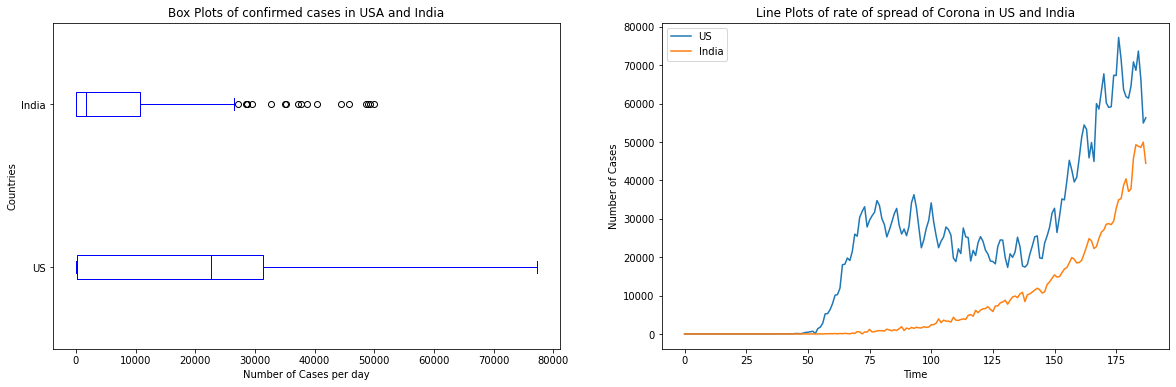

In [628]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Box plot
dfUSI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of confirmed cases in USA and India')
ax0.set_xlabel('Number of Cases per day')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
dfUSI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of rate of spread of Corona in US and India')
ax1.set_ylabel('Number of Cases')
ax1.set_xlabel('Time')

plt.show()

**Analysis:**
* The box plot shows that the number of cases increasing per day fall between 0 to 10000 for India, and between 0 to 30000 for US. 
* The median number of cases increasing per day for India is around 1000 whereas, for US is 23000
* There has been a steady increase of cases in India while in US, there has been a sudden increase.